# Project  :     " BIKE RENTAL COUNT PREDICTION"                            

## Problem Statement:
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.

The details of data attributes in the dataset are as follows -
instant: Record index

dteday: Date

season: Season (1:springer, 2:summer, 3:fall, 4:winter)

yr: Year (0: 2011, 1:2012)

mnth: Month (1 to 12)

hr: Hour (0 to 23)

holiday: weather day is holiday or not (extracted fromHoliday Schedule)

weekday: Day of the week

workingday: If day is neither weekend nor holiday is 1, otherwise is 0.

weathersit: (extracted fromFreemeteo)

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered


In [563]:
# #!/usr/bin/env python
# #!pip install "library name"  # install relevent libraries with this command.
# # Importing required libraries. 

import os # input and output operations
import numpy as np # used for data analysis
import pandas as pd # for data manipulation and analysis
#import pandas_profiling # For Overview of data-summary statistics with plots
import pickle # Dumping your model in pkl format

# For data visualizations 
import matplotlib.pyplot as plt # used for data visualizations
import seaborn as sns # used for data visualizations
#from ggplot import * # used for data visualizations

# For rendering the plots in jupyter notebook
%matplotlib inline

from random import randrange, uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from ggplot import *

In [564]:
# Set working directory

os.chdir("C:/Users/Sanjeev/Desktop/Edwisor/Bike_rent_Prediction_2nd_Project")
print(os.getcwd())

C:\Users\Sanjeev\Desktop\Edwisor\Bike_rent_Prediction_2nd_Project


# Understanding the data :

In [565]:
bike_data =  pd.read_csv("day.csv")

# let's preview the training data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [566]:
 print("Shape of data is: ",bike_data.shape) #checking the number of rows and columns in training data


Shape of data is:  (731, 16)


# Overview of the training data  :

# Exploratory Data Analysis

In [567]:
# Let's Check for data types of train data:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [568]:
# Let's understand basic statistics of each (numeric & non-numeric) variables in train data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [569]:
print(bike_data.shape)
print(bike_data.columns)
print(bike_data.nunique())

(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [570]:
# Check variables names of dataset,observed that shortcut names are used viz., hum for humidity
# yr for year ,mnth for month,cnt for count
# Now Rename them for ease of understanding it better:

print("Before renaming variables: ",bike_data.columns)

bike_data = bike_data.rename(columns = {'yr':'year','mnth':'month','weathersit':'weather',
                                        'temp':'temperature','hum':'humidity','cnt':'count'})


Before renaming variables:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [571]:
print("After renaming variables: ",bike_data.columns)

After renaming variables:  Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [572]:
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [573]:
# In this dataset cnt is our target variable and it is continous variable 
bike_data['count'] .dtype

dtype('int64')

# Missing Value anlysis

In [574]:
# checking for missing values in dataset
bike_data.isnull().sum()

instant        0
dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [575]:
# Remove these variables 
# instant variable, as it is index in dataset
# date variable as we have to predict count on seasonal basis not date basis
# casual and registered variable as count is sum of these two variables
# cnt = casual + registered

bike_data = bike_data.drop(['casual','registered','instant','dteday'],axis=1)

# Lets check dimensions of data after removing unnecessary variables
bike_data.shape

(731, 12)

In [576]:
# Make list of categorical and numerical variables of dataframe 

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']


In [577]:
# looking at five point summary for our numerical variables
bike_data[cnames].describe()


,temperature,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


In [578]:
# unique values of categories variables
bike_data[cat_cnames].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weather        3
dtype: int64

# Outlier Analysis:

temperature


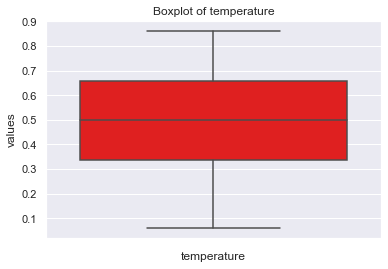

atemp


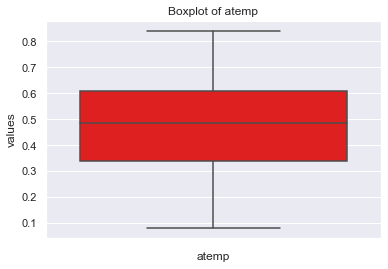

humidity


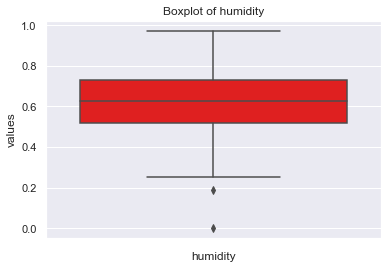

windspeed


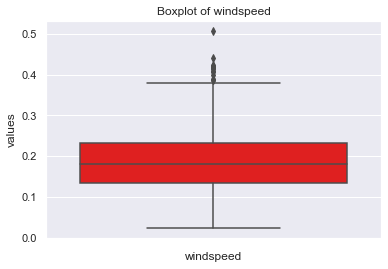

count


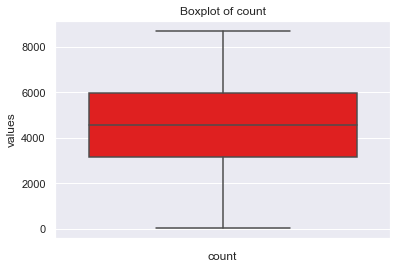

In [579]:
# Lets save copy of dataset before preprocessing
df = bike_data.copy()
Bike_Rent = df.copy() 


##Plot boxplot to visulazie outliers-
A =['red','blue']
for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i], color='red' )
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()
    
# From boxplot we can see outliers in humidity and outliers in windspeed

In [580]:
# Lets cap outliers and inliers with upper fence and lower fence values 
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(Bike_Rent[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    Bike_Rent.loc[Bike_Rent[i] < LL ,i] = LL 

   # For outliers
    Bike_Rent.loc[Bike_Rent[i] > UL ,i] = UL 
     

temperature
atemp
humidity
windspeed
count


temperature


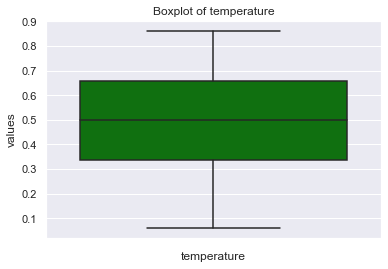

atemp


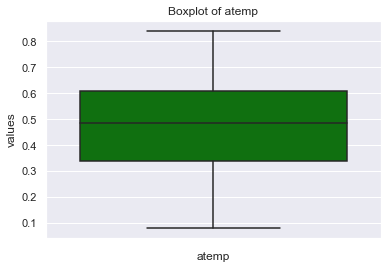

humidity


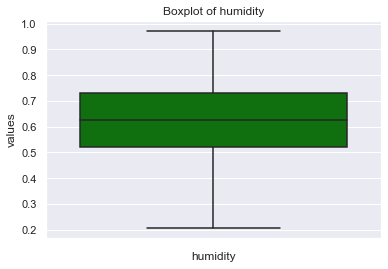

windspeed


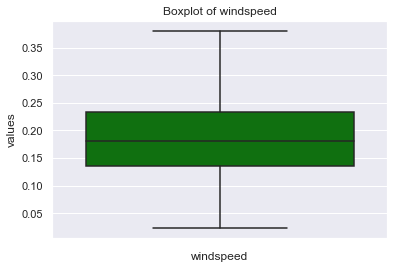

count


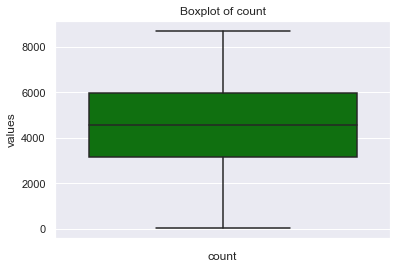

In [581]:
# Lets see our boxplots after removing outliers 

for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i], color='green')
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

# Data understanding using visualization:

### Multi-Variate Analysis,    Univariate Analysis and   Bi-Variate Analysis of Train dataset

## Univariate Analysis:

#### Univariate Analysis : Displays the statistic details or descriptive statistics of each variable
#### Histogram for (Numeric) Continuous variables to check  distribution of each variable 

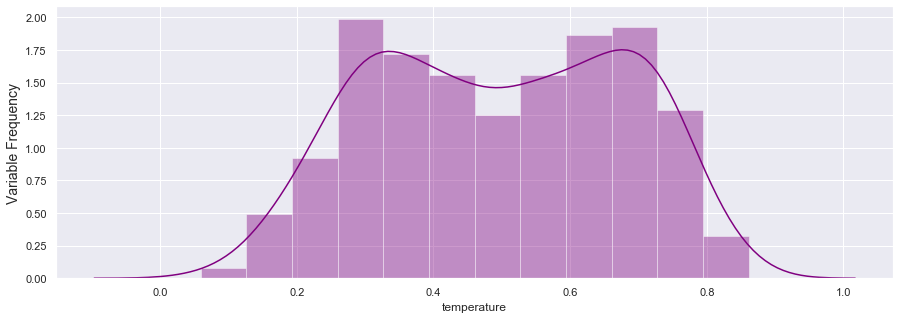

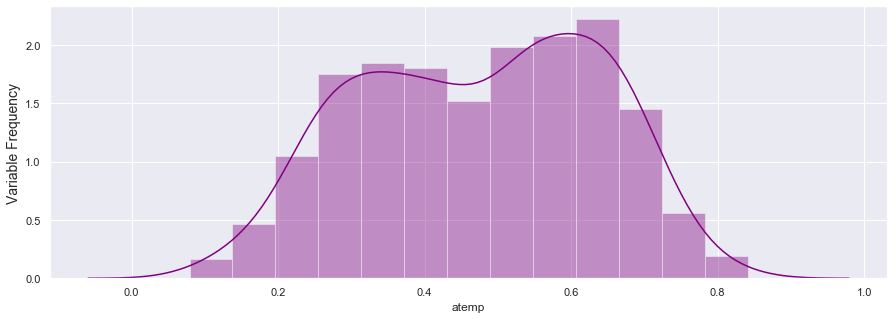

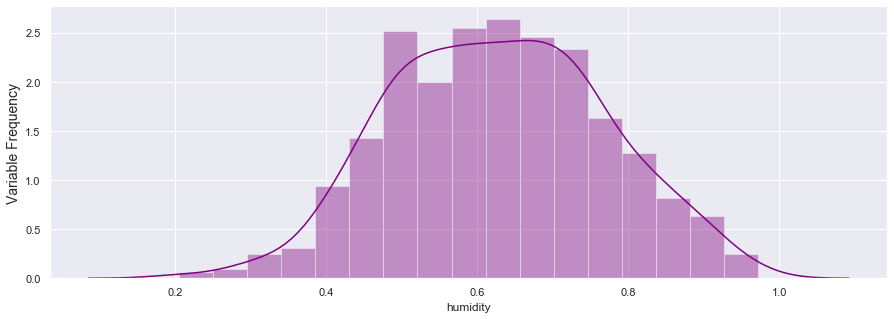

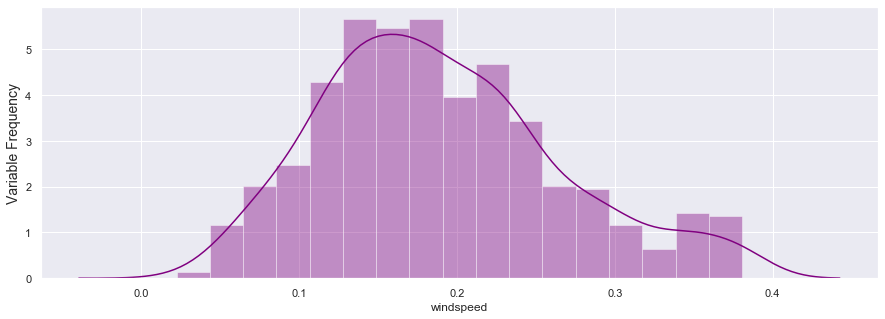

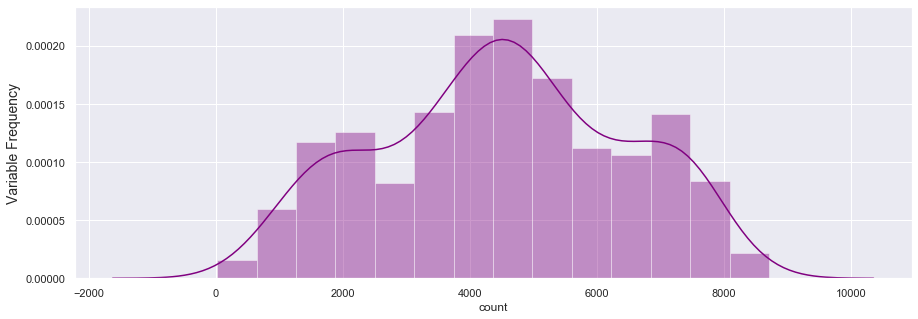

In [582]:
# Histogram for continuous variables to check  distribution of each variable 
for i in cnames:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(Bike_Rent[i], kde=True,  color='purple',bins ='auto')
    #plt.title(cnamestrain[i], fontsize=14)
   # plt.xlabel(cnamestrain[i], fontsize=14)
    plt.ylabel('Variable Frequency', fontsize=14)
    plt.show()

## BI-VARIATE ANALYSIS :

### Bi-variate Analysis using Catplots:

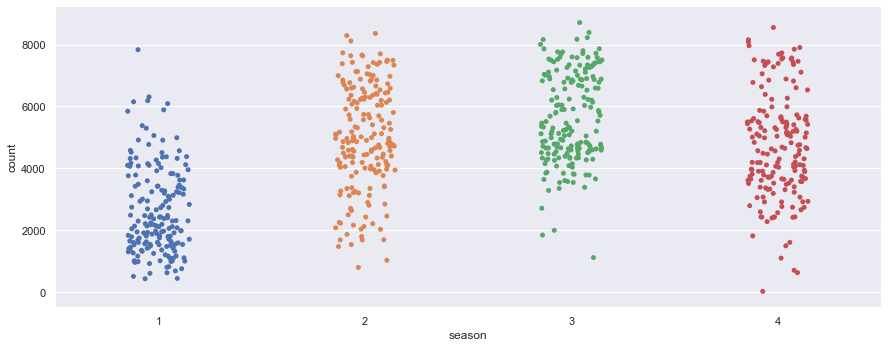

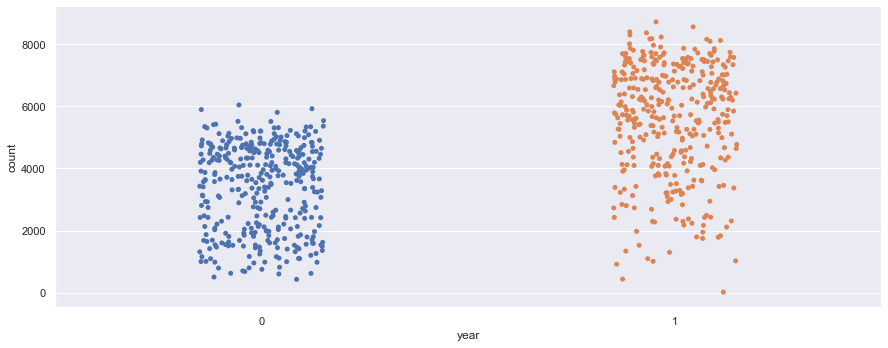

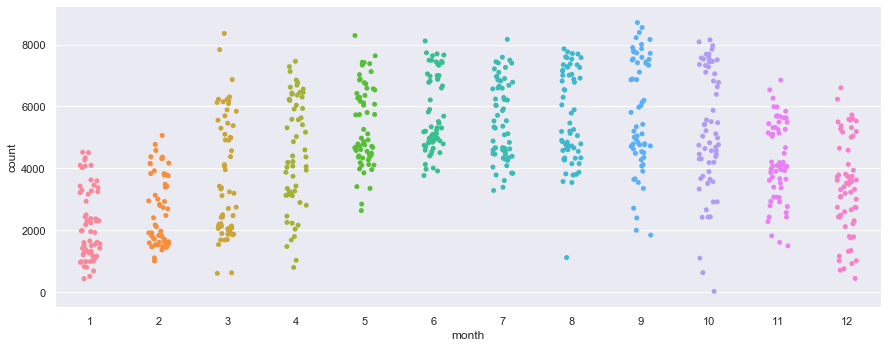

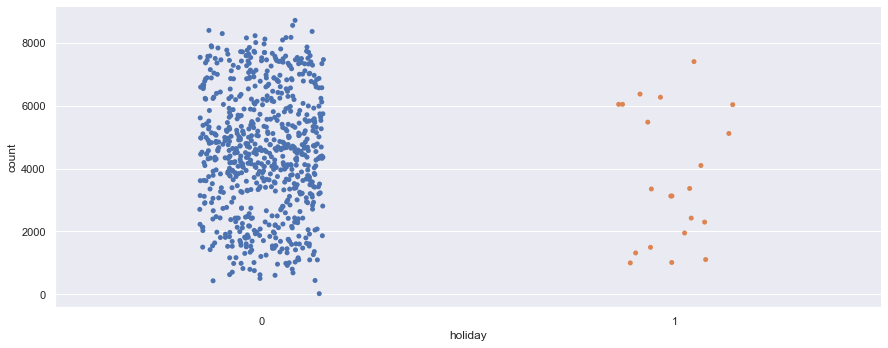

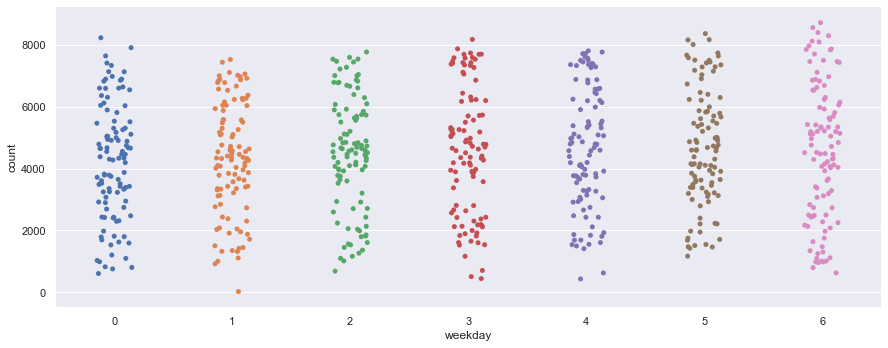

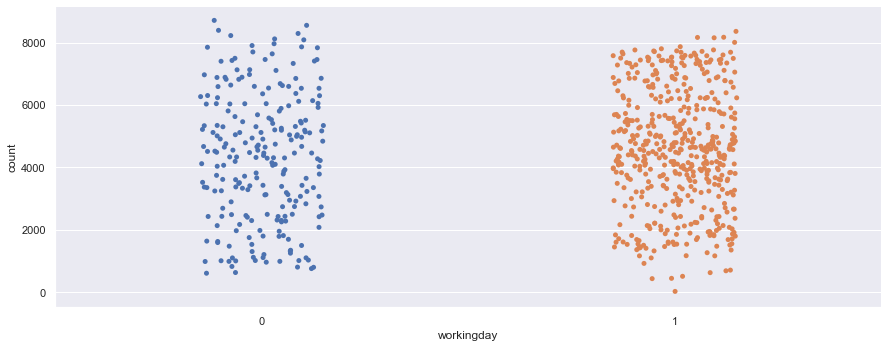

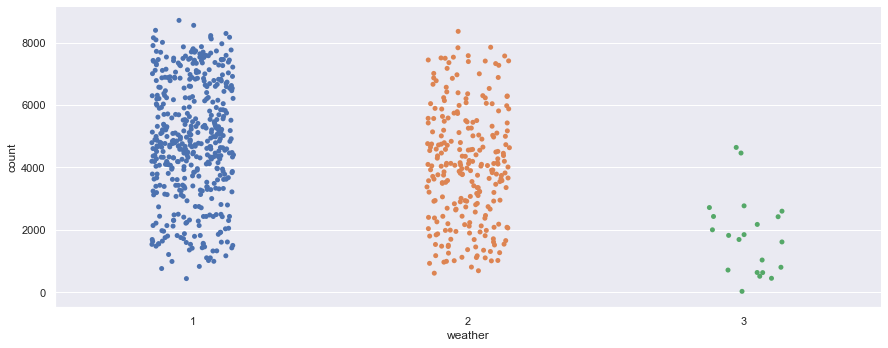

In [583]:
# Lets check impact of categorical  variables on target variable
for i in cat_cnames:
    sns.catplot(x=i,y="count",data=Bike_Rent,jitter='0.15',aspect=2.5)
    fname = str(i)+'.pdf'
    plt.savefig(fname) 

*From Fisrt plot we can see that season 2,3 and 4 have more bike count as comapre to season 1. the daily bike count for these season was between 4000 to 8000.
*From year plot we can see that bike count is increased in 2012 as compared to 2011.
*From month plot we can see the bike count maximum between 4 to 10 month.
*From holiday the bike count is maximum as comapre to non holiday.
*Bike count is maximum for day 0,5 and 6 as per weekday varaible.
*FOr weather 1 the count of bike is maximum, after that for weather 2.

### Bi-variate Analysis using Barplots:

In [584]:
## take a copy of data
df=bike_data
df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [585]:
df['actual_season'] = df['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df['actual_holiday'] = df['holiday'].replace({0:"Working day",1:"Holiday"})
df['act_weather_condition'] = df['weather'].replace({1:"Clear",2:"Cloudy/Mist",3:"Light Rain/snow/Scattered clouds",4:"Heavy Rain/Snow/Fog"})
df['actual_weekday'] = df['weekday'].replace({0:"Monday",1:"Tuesday", 2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df['actual_year'] = df['year'].replace({0:"2011",1:"2012"})
df['actual_month'] = df['month'].replace({1:"Jan",2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

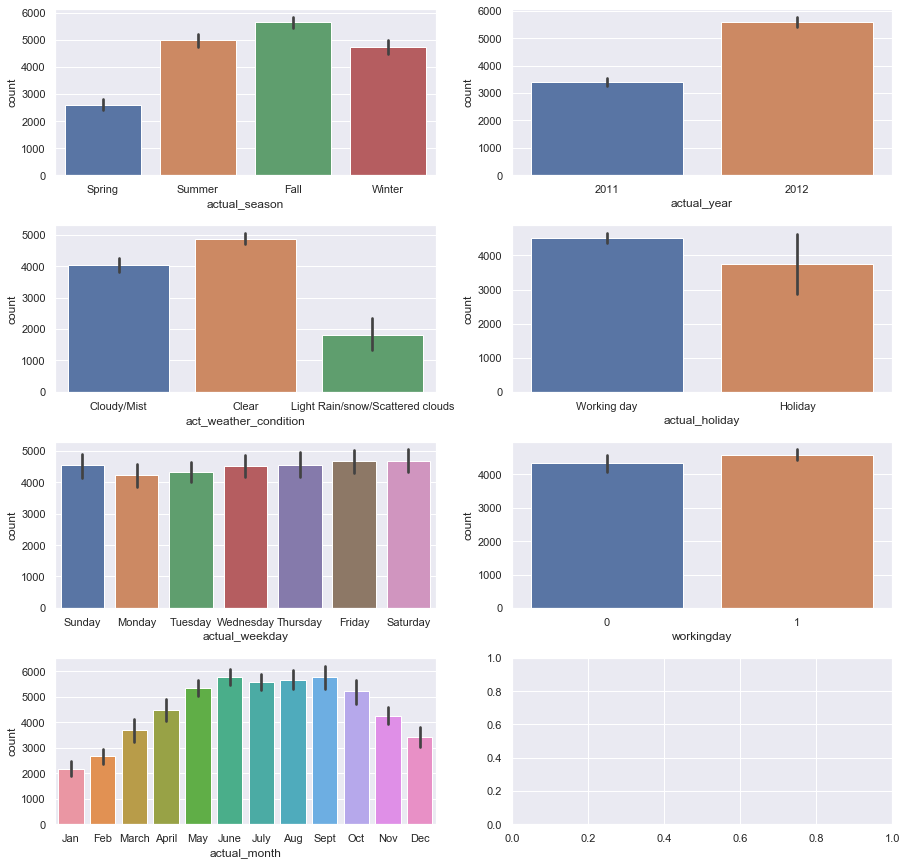

In [586]:
# Let us check impact of categorical variables on count
# For Catagorical Variables
fig, axarr = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)

sns.barplot(x='actual_season', y='count',data=df,ax=axarr[0][0])
sns.barplot(x='actual_year',    y='count',data=df,ax=axarr[0][1])
sns.barplot(x='act_weather_condition',  y='count',data=df,ax=axarr[1][0])
sns.barplot(x='actual_holiday',y='count',data=df,ax=axarr[1][1])
sns.barplot(x='actual_weekday',     y='count',data=df,ax=axarr[2][0])
sns.barplot(x='workingday',  y='count',data=df,ax=axarr[2][1])

sns.barplot(x='actual_month',  y='count',data=df,ax=axarr[3][0])

In [587]:
df_Cnames=['actual_season','actual_holiday','act_weather_condition','actual_weekday','actual_year','actual_month']


In [588]:
# Let us check impact of categorical variables on count 
for i in df_Cnames:
    print ('frequency of count vs',i)
    print(df.groupby([i])['count'].sum(),'\n')

frequency of count vs actual_season
actual_season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: count, dtype: int64 

frequency of count vs actual_holiday
actual_holiday
Holiday          78435
Working day    3214244
Name: count, dtype: int64 

frequency of count vs act_weather_condition
act_weather_condition
Clear                               2257952
Cloudy/Mist                          996858
Light Rain/snow/Scattered clouds      37869
Name: count, dtype: int64 

frequency of count vs actual_weekday
actual_weekday
Friday       485395
Monday       444027
Saturday     487790
Sunday       477807
Thursday     473048
Tuesday      455503
Wednesday    469109
Name: count, dtype: int64 

frequency of count vs actual_year
actual_year
2011    1243103
2012    2049576
Name: count, dtype: int64 

frequency of count vs actual_month
actual_month
April    269094
Aug      351194
Dec      211036
Feb      151352
Jan      134933
July     344948
June     346342
March    228

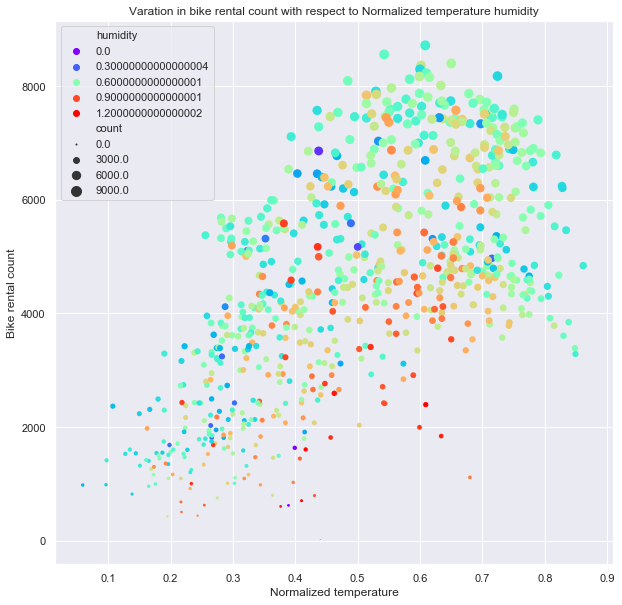

In [589]:
# Lets check impact of continous variables on target variable

f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="humidity", size="count",
                palette="rainbow",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&humidity_plot.pdf')

#*From the plot we can see that count is maximum when temprature 0.4 to 0.7 and humidity below 0.75.

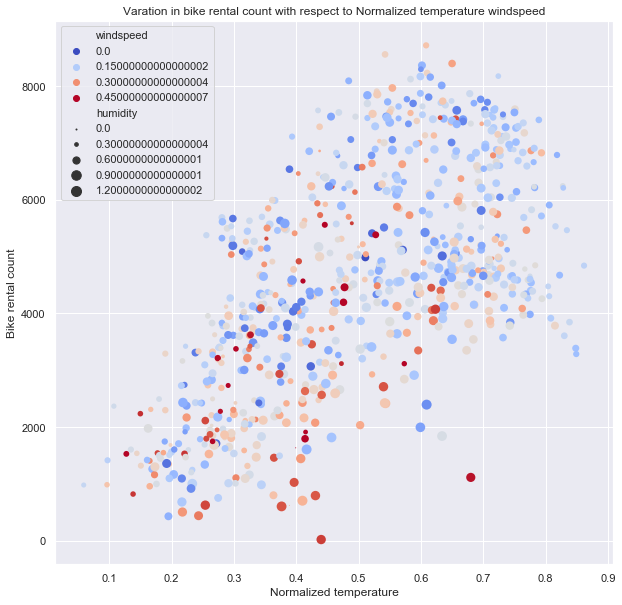

In [590]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="windspeed", size="humidity",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature windspeed")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&windspeed_plot.pdf')

#*From the above plot we can see bike count is maximum between temp 0.5 to 0.7, windspped below 0.15 and humidity less than 0.75

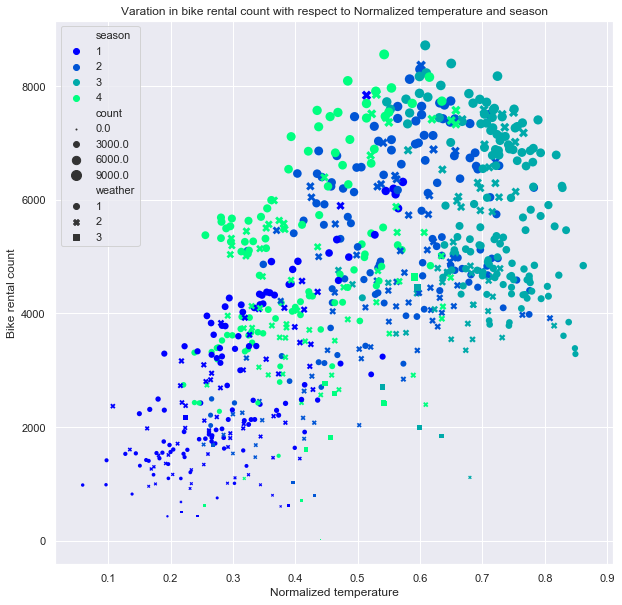

In [591]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="season", size="count",style= "weather",
                palette="winter",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to Normalized temperature and season")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&season_plot.pdf')

#*From figure it is clear that maximum bike count is for season 2 and 3, when the temp between 0.5 to 0.7, and weather was 1 and 2

### Bi-variate Analysis using Scatter plots:

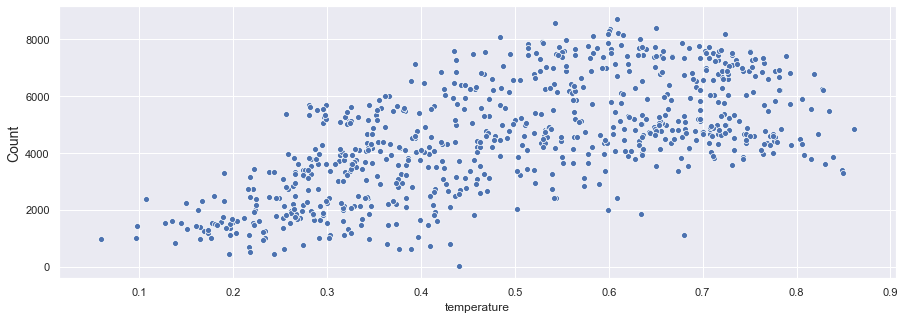

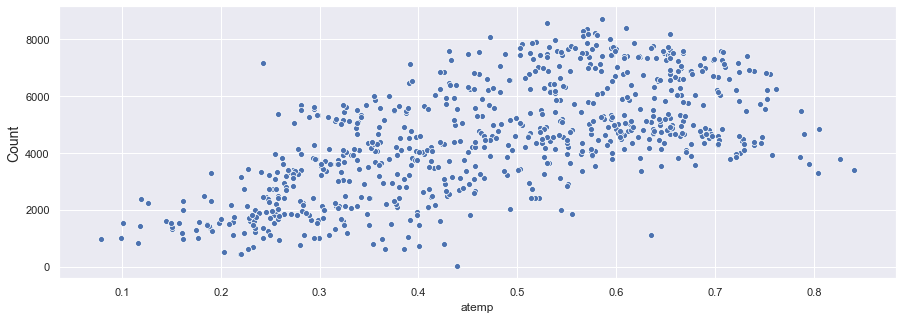

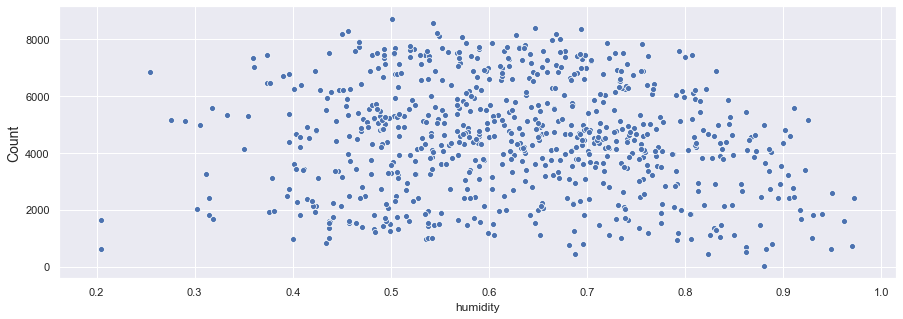

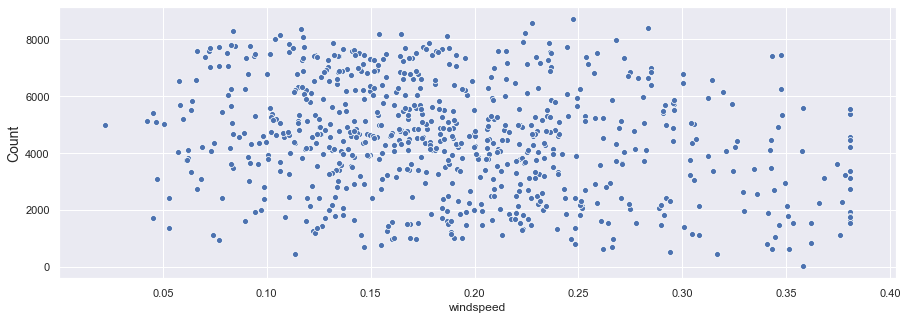

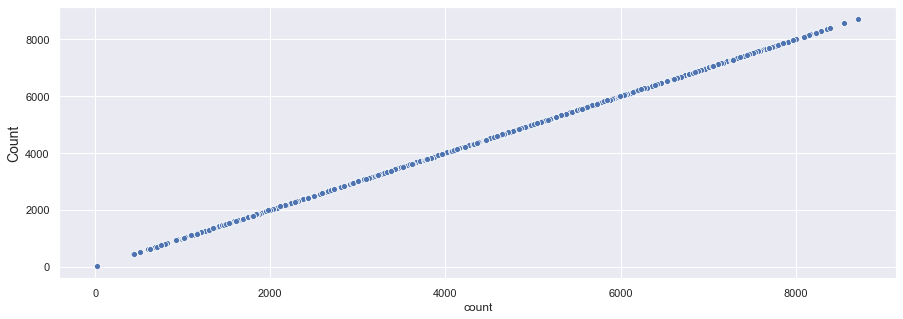

In [592]:
# Bi-variate Analysis: 
# Here one variable is independent while other one is dependent.So, here count is dependent variable and rest all variables are independent variables.
# let'scheck scatter plot for the variables with count how are they co-rrelated.

for i in cnames:
    sns.set(rc={'figure.figsize':(15,5)})
    ax = sns.scatterplot(x=Bike_Rent[i], y="count", data=Bike_Rent)
    #plt.title(cnames1[i], fontsize=14)
    #plt.xlabel(cnames1[i], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

# Feature Selection  :

In [593]:
Bike_Rent.shape

(731, 12)

In [594]:
Bike_Rent.dtypes

season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [595]:
print(Bike_Rent.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [596]:
# Correlation analysis
# Using corrplot library we do correlation analysis for numeric variables
# Lets recall numeric variabls and derive correlation matrix and plot

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Correlation matrix 
# Extract only numeric variables in dataframe for correlation
df_corr= Bike_Rent.loc[:,cnames]

# Generate correlation matrix
corr_matrix = df_corr.corr()
(print(corr_matrix))


             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.126722  -0.156916  0.627494
atemp           0.991702  1.000000  0.139924  -0.182948  0.631066
humidity        0.126722  0.139924  1.000000  -0.241160 -0.105664
windspeed      -0.156916 -0.182948 -0.241160   1.000000 -0.233657
count           0.627494  0.631066 -0.105664  -0.233657  1.000000


Text(0.5, 1, 'Correlation Plot of Continous Variables')

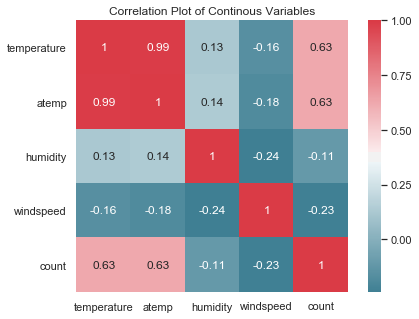

In [597]:
# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Plot using seaborn library
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.title("Correlation Plot of Continous Variables")

# From correlation analysis temp and atemp variables are highly correlated 
# so delete atemp variable 

In [598]:
# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [599]:
# Lets find significant categorical variables usig ANOVA test 
# Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_cnames:
    mod = ols('count' + '~' + i, data = Bike_Rent).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

From the anova result, we can observe working day,weekday and holiday has p value > 0.05, so delete this variable not consider in model.

# Dimension reduction

In [600]:
Bike_Rent = Bike_Rent.drop(['atemp','holiday','weekday','workingday'], axis=1)

In [601]:
# Lets check dimensions after dimension reduction 
Bike_Rent.shape

(731, 8)

In [602]:
# Lets check column names after dimension reduction 
Bike_Rent.columns

Index(['season', 'year', 'month', 'weather', 'temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [603]:
Bike_Rent.head()

,season,year,month,weather,temperature,humidity,windspeed,count
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [604]:
# Lets define/update  continous and categorical variables after dimension reduction

# Continuous variable
cnames = ['temperature','humidity', 'windspeed', 'count']

# Categorical variables
cat_cnames = ['season', 'year', 'month','weather']

# Feature Scaling

In [605]:
# Since as it is mentioned in data dictionary the values of 
# temp,humidity,windspeed variables are already normalized values 
# So no need to go for feature scaling instead we will visualize the variables 
# to see normality

## Normality Check

temperature


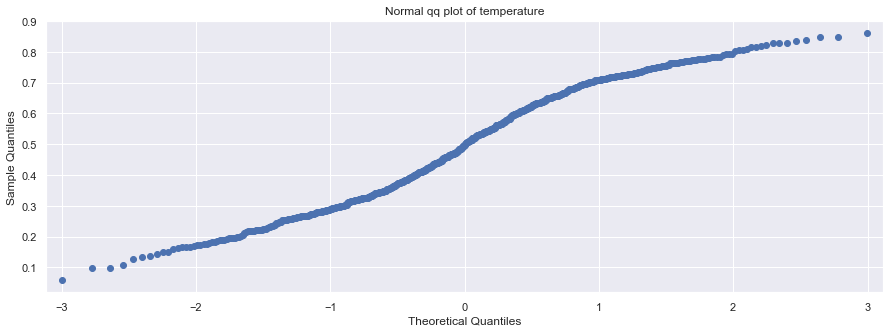

humidity


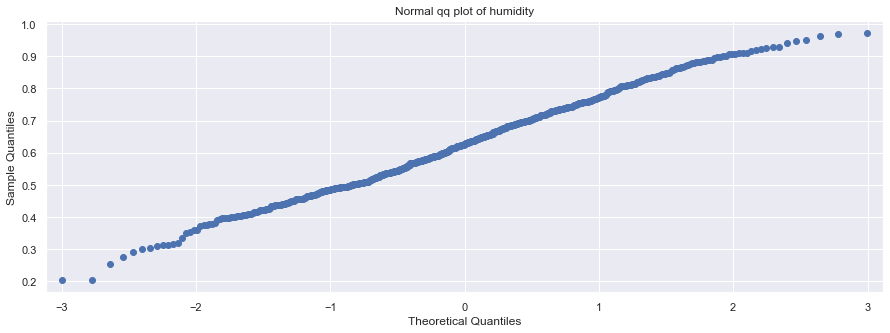

windspeed


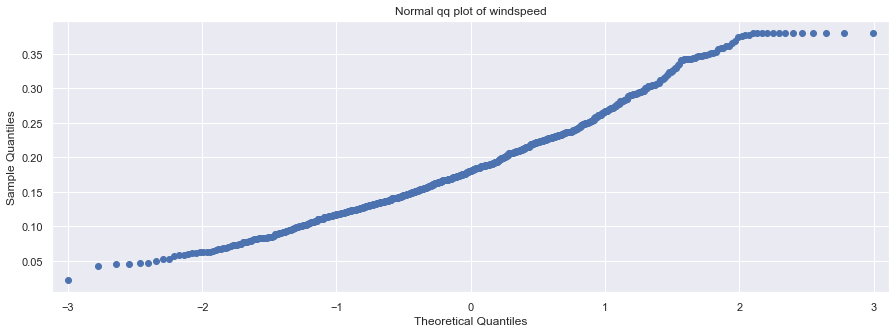

count


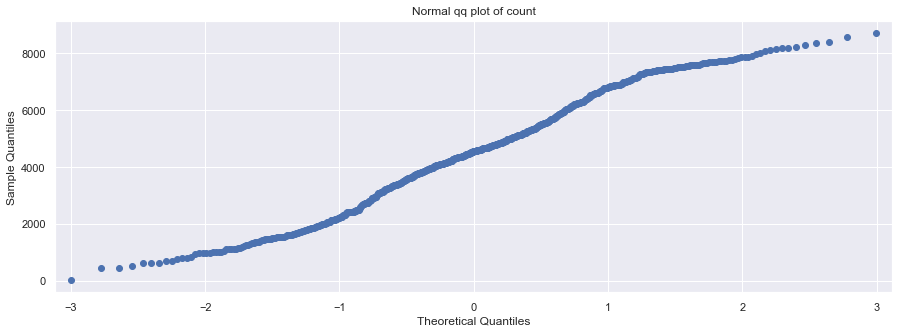

In [606]:
for i in cnames:
    print(i)
    sm.qqplot(Bike_Rent[i])
    plt.title("Normal qq plot of " +i)
    plt.show()

temperature


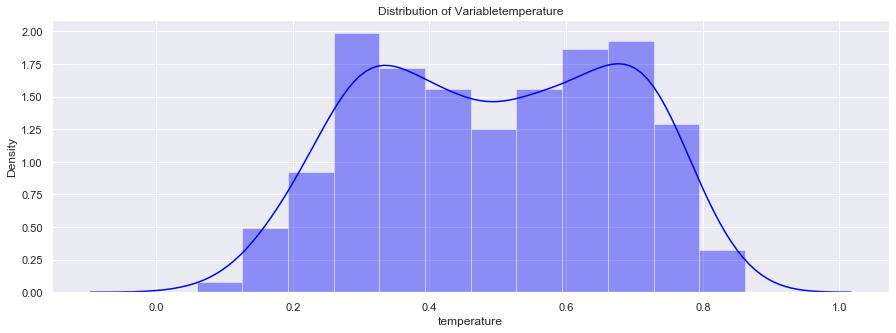

humidity


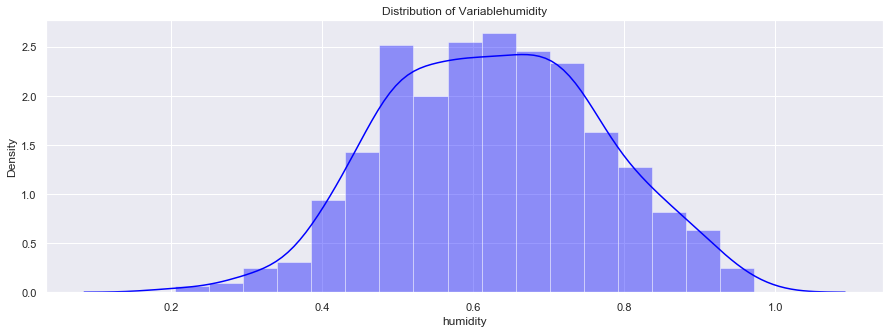

windspeed


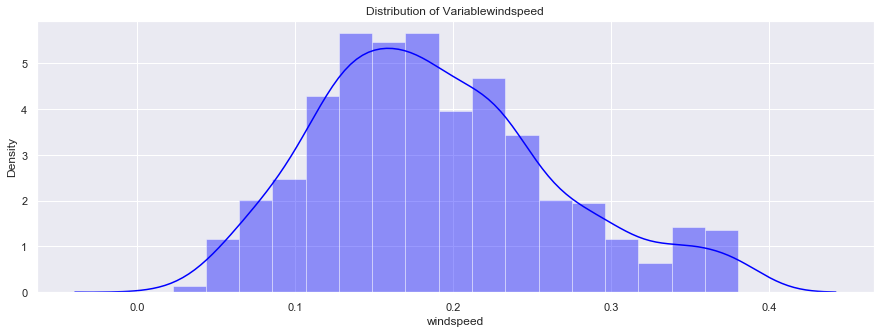

count


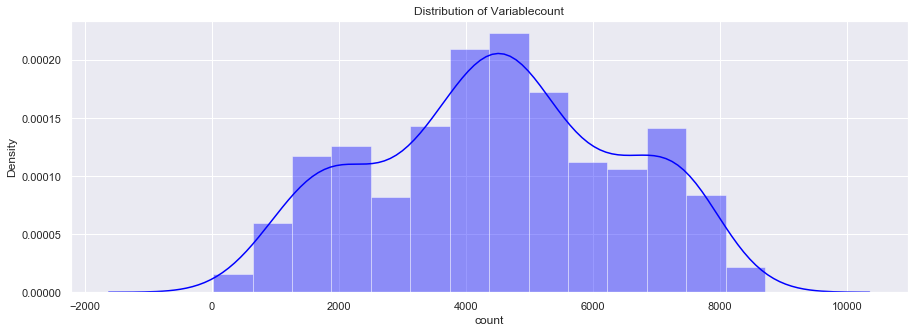

In [607]:
for i in cnames:
    print(i)
    sns.distplot(Bike_Rent[i],bins='auto',color='blue')
    plt.title("Distribution of Variable"+i)
    plt.ylabel("Density")
    plt.show()

In [608]:
Bike_Rent.loc[:,'count'] = Bike_Rent.loc[:,'count'].round()
Bike_Rent.describe()

# from distribution plot,normal qq plot  and summary  it is clear that data is already normalized.

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.628197,0.189846,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.141320,0.075644,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.204687,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.380611,8714.000000


In [609]:
Bike_Rent.dtypes

season           int64
year             int64
month            int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

# MODEL DEVELOPMENT

In [610]:
# Load Required libraries for model development 

# For Machine learning 

from sklearn.model_selection import train_test_split #used to split dataset into train and test

from sklearn.metrics import mean_squared_error # used to calculate MSE

from sklearn.metrics import r2_score # used to calculate r square

from sklearn.linear_model import LinearRegression # For linear regression

from sklearn.tree import DecisionTreeRegressor # For Decision Tree

from sklearn.ensemble import RandomForestRegressor # For RandomForest

from sklearn import metrics

In [611]:
# Lets convert all categorical variables ito dummy variables 
# As we cant pass categorical variables directly in to regression problems
# Lets save our preprocessed data into df data set 

df1 = Bike_Rent
Bike_Rent = df1

# Lets call Categorical varaibles after feature selection using ANOVA 
cat_cnames = ['season', 'year', 'month','weather']

#  Create categorical variables to dummy variables-
Bike_Rent = pd.get_dummies(Bike_Rent,columns=cat_cnames)
Bike_Rent.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [612]:
# To avoid dummy variable trap I am hoing to remove 1 dummy variable form each type of categorical variable
Dummy_Drop = ['season_4', 'year_1', 'month_12','weather_3']
Bike_Rent.drop(Dummy_Drop,axis=1,inplace=True)

In [613]:
# Before developing the model lets check the dimensions of data 
Bike_Rent.shape

(731, 21)

In [614]:
Bike_Rent.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,year_0,month_1,month_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,weather_1,weather_2
0,0.344167,0.805833,0.160446,985.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.363478,0.696087,0.248539,801.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.196364,0.437273,0.248309,1349.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [615]:
Bike_Rent.columns

Index(['temperature', 'humidity', 'windspeed', 'count', 'season_1', 'season_2',
       'season_3', 'year_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'weather_1', 'weather_2'],
      dtype='object')

In [616]:
# Lets Divide the data into train and test set 

# Split data for predictor and target seperatly
X= Bike_Rent.drop(['count'],axis=1)
y= Bike_Rent['count']

In [617]:
Bike_Rent.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,year_0,month_1,month_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,weather_1,weather_2
0,0.344167,0.805833,0.160446,985.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.363478,0.696087,0.248539,801.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.196364,0.437273,0.248309,1349.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [618]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [619]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 20)
(147, 20)
(584,)
(147,)


In [620]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [621]:
## Function to print the characteristics of model
def Model_detail(MAPE_test,r2_test,RMSE_test):
    print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
    print("R^2_score for test data="+str(r2_test))
    print("RMSE for test data="+str(RMSE_test))
    print("Accuracy :="+str(100-MAPE_test))
    return None

In [622]:
# Function for Error metrics to display the performance of model
def Error_Metrics(Model_name,MAPE_test,r2_test,RMSE_test):
    Error_Metrics = {'Model Name': [Model_name],'Accuracy':[100-MAPE_test],'MAPE_Test':[MAPE_test],
      'R-squared_Test':[r2_test],'RMSE_test':[RMSE_test]}
    Results = pd.DataFrame(Error_Metrics)
    return Results

In [623]:
# Before building multiple linear regression model lets check the 
# vif for multicolinearity
# continous variables after feature selection using correlation analysis 

# Import VIF function from statmodels Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term:

X = Bike_Rent[["temperature","humidity","windspeed"]].dropna() #subset the dataframe
X ['Intercept'] = 1

# Compute and view VIF:

vif = pd.DataFrame()           # Create an empty dataframe
vif["Variables"] = X.columns   # Add "Variables" column to empty dataframe
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

     Variables        VIF
0  temperature   1.034137
1     humidity   1.070959
2    windspeed   1.080362
3    Intercept  41.553921


None of the variables from the 3 input variables has collinearity problem.

# Linear Regression Model  :

In [624]:
# Import libraries
import statsmodels.api as sm

# Linear Regression model for regression 
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              959.6
Date:                Wed, 15 Jan 2020   Prob (F-statistic):                        0.00
Time:                        01:55:06   Log-Likelihood:                         -4753.7
No. Observations:                 584   AIC:                                      9547.
Df Residuals:                     564   BIC:                                      9635.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [625]:
# Model prediction on test data
LR_test= LR_model.predict(X_test)

# Model performance on test data
MAPE_test= MAPE(y_test,LR_test)

# r2 value for test data-
r2_test=r2_score(y_test,LR_test)

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Mean Absolute Precentage Error for test data=20.841930379420212
R^2_score for test data=0.7819292243796828
RMSE for test data=846.3506302699261
Accuracy :=79.1580696205798


In [626]:
LR_Results = Error_Metrics('Linear Regression',MAPE_test,r2_test,RMSE_test)


In [627]:
LR_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Linear Regression,79.15807,20.84193,0.781929,846.35063


Lets build some more models using different ml algorithms for more accuracy 
and less prediction error

# Desicision Tree

In [628]:
# Lets Build decision tree model on train data
# Import libraries
from sklearn.tree import DecisionTreeRegressor

# Decision tree for regression
DT_model= DecisionTreeRegressor().fit(X_train,y_train)


# Model prediction on test data
DT_test= DT_model.predict(X_test)


# Model performance on test data
MAPE_test= MAPE(y_test,DT_test)


# r2 value for test data
r2_test=r2_score(y_test,DT_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DT_test))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Mean Absolute Precentage Error for test data=19.33552896570294
R^2_score for test data=0.7327303258815602
RMSE for test data=936.9716052878264
Accuracy :=80.66447103429707


In [629]:
DT_Results = Error_Metrics('Desicision Tree',MAPE_test,r2_test,RMSE_test)

In [630]:
DT_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Desicision Tree,80.664471,19.335529,0.73273,936.971605


In [631]:
from sklearn import tree

# Random Search CV In Decision Tree 

In [691]:
# Import libraries 
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

# Lets build a model using above parameters on train data 
RDT_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RDT_model= RDT_model.fit(X_train,y_train)


In [633]:
# Lets look into best fit parameters
best_parameters = RDT_model.best_params_
print(best_parameters)

{'max_depth': 5}


In [634]:
# Again rebuild decision tree model using randomsearch best fit parameter ie
# with maximum depth = 5
RDT_best_model = RDT_model.best_estimator_

In [635]:
# Prediction on train data 
RDT_train = RDT_best_model.predict(X_train)

# Prediction on test data 
RDT_test = RDT_best_model.predict(X_test)

In [636]:
# Lets check Model performance on train data using error metrics of regression like mape,rsquare value

# MAPE for test data 
MAPE_test= MAPE(y_test,RDT_test)


# Rsquare for test data
r2_test=r2_score(y_test,RDT_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RDT_test))


# Lets print the results 
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RDT_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
Mean Absolute Precentage Error for test data=18.005792343718657
R^2_score for test data=0.8258697500492262
RMSE for test data=756.290594763957
Accuracy :=81.99420765628135


In [637]:
RDT_Results = Error_Metrics('Random Search CV In Decision Tree',MAPE_test,r2_test,RMSE_test)

In [638]:
RDT_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Random Search CV In Decision Tree,81.994208,18.005792,0.82587,756.290595


# Grid Search CV in Decision Tree

In [639]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

# Lets build a model using above parameters on train data
GDT_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GDT_model= GDT_model.fit(X_train,y_train)

In [640]:
# Lets look into best fit parameters from gridsearch cv DT
best_parameters = GDT_model.best_params_
print(best_parameters)

{'max_depth': 5}


In [641]:
# Again rebuild decision tree model using gridsearch best fit parameter ie
# with maximum depth = 5
GDT_best_model = GDT_model.best_estimator_

In [642]:

# Prediction on train data  test data-
GDT_test = GDT_best_model.predict(X_test)

In [643]:
# Lets check Model performance on train data using error metrics of regression like mape,rsquare value

# MAPE for test data 
MAPE_test= MAPE(y_test,GDT_test)


# Rsquare for train data
r2_test=r2_score(y_test,GDT_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GDT_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GDT_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
Mean Absolute Precentage Error for test data=18.005792343718657
R^2_score for test data=0.8258697500492262
RMSE for test data=756.290594763957
Accuracy :=81.99420765628135


In [644]:
GDT_Results = Error_Metrics('Decision Tree Grid Search CV',MAPE_test,r2_test,RMSE_test)

In [645]:
GDT_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Decision Tree Grid Search CV,81.994208,18.005792,0.82587,756.290595


# Random Forest 

In [646]:
# Import libraris
from sklearn.ensemble import RandomForestRegressor

# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)


# Prediction on test data
RF_test= RF_model.predict(X_test)


# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)


# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Mean Absolute Precentage Error for test data=13.280634173097106
R^2_score for test data=0.9097573638789065
RMSE for test data=544.4493384444994
Accuracy :=86.7193658269029


In [647]:
# Lets print results of Randomforest random search
RF_Results = Error_Metrics('Random Forest',MAPE_test,r2_test,RMSE_test)

In [648]:
RF_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Random Forest,86.719366,13.280634,0.909757,544.449338


# Random Search CV in Random Forest 

In [649]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

# Lets build a model using above parameters on train data
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RRF_model= RRF_model.fit(X_train,y_train)

In [650]:
# Best parameters for model
best_parameters = RRF_model.best_params_
print(best_parameters)

{'n_estimators': 55, 'max_depth': 15}


In [651]:
# Again rebuild random forest  model using gridsearch best fit parameter ie {'n_estimators': 43, 'max_depth': 7}
RRF_best_model = RRF_model.best_estimator_

In [652]:
# Prediction on test data
RRF_test = RRF_best_model.predict(X_test)

In [653]:
# Lets check Model performance on train data using error metrics of regression like mape,rsquare value

# MAPE for test data
MAPE_test= MAPE(y_test,RRF_test)


# Rsquare for test data
r2_test=r2_score(y_test,RRF_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RRF_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RRF_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'n_estimators': 55, 'max_depth': 15}
Best Model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=55, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for test data=13.164604886820424
R^2_score for test data=0.9140192867610516
RMSE for test data=531.4373936840007
Accuracy :=86.83539511317957


In [654]:
# Lets print results of Randomforest random search
RRF_results = Error_Metrics('Random Forest Random Search CV',MAPE_test,r2_test,RMSE_test)

In [655]:
RRF_results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Random Forest Random Search CV,86.835395,13.164605,0.914019,531.437394


# Grid search CV in Random Forest 

In [656]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [657]:
# Lets build a model using above parameters on train data using random forest grid search cv 
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GRF_model= GRF_model.fit(X_train,y_train)

In [658]:
# Best fit parameters for model
best_parameters_GRF = GRF_model.best_params_
print(best_parameters_GRF)

{'max_depth': 13, 'n_estimators': 19}


In [659]:
# Again rebuild random forest model using gridsearch best fit parameter {'max_depth': 7, 'n_estimators': 11}
GRF_best_model = GRF_model.best_estimator_

In [660]:
# Prediction on test data
GRF_test = GRF_best_model.predict(X_test)

In [661]:
# Lets check Model performance on train data using error metrics of regression like mape,rsquare value

# MAPE for test data
MAPE_test= MAPE(y_test,GRF_test)

# Rsquare for test data
r2_test=r2_score(y_test,GRF_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GRF_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GRF_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'n_estimators': 55, 'max_depth': 15}
Best Model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=19, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for test data=13.878527400149524
R^2_score for test data=0.9014935658909338
RMSE for test data=568.8318257385259
Accuracy :=86.12147259985048


In [662]:
# Lets print results of Randomforest grid search cv

GRF_results = Error_Metrics('Random Forest Grid Search CV',MAPE_test,r2_test,RMSE_test)

In [663]:
GRF_results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Random Forest Grid Search CV,86.121473,13.878527,0.901494,568.831826


# Gradient Boosting 

In [664]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

# Lets build a Gradient Boosting model for regression problem
GB_model = GradientBoostingRegressor().fit(X_train, y_train)


# Model prediction on test data
GB_test= GB_model.predict(X_test)


# Model performance on test data
MAPE_test= MAPE(y_test,GB_test)


# Rsquare value for test data
r2_test=r2_score(y_test,GB_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GB_test))


# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Mean Absolute Precentage Error for test data=12.099511291439896
R^2_score for test data=0.911532929047707
RMSE for test data=539.0665849141544
Accuracy :=87.9004887085601


In [665]:
# Lets print the result 
GB_results = Error_Metrics('Gradient Boosting',MAPE_test,r2_test,RMSE_test)

In [666]:
GB_results 

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Gradient Boosting,87.900489,12.099511,0.911533,539.066585


# Random Search CV in Gradient Boosting 

In [667]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomGradientBoosting = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

In [668]:
# Lets build a model using above parameters on train data
RGB_model= RandomizedSearchCV(RandomGradientBoosting,param_distributions= random_search,n_iter=5,cv=5)
RGB_model= RGB_model.fit(X_train,y_train)

In [669]:
# Best parameters for model
best_parameters = RGB_model.best_params_
print(best_parameters)

{'n_estimators': 35, 'max_depth': 9}


In [670]:
# Again rebuild random forest model using gridsearch best fit parameter {'n_estimators': 81, 'max_depth': 5}
RGB_best_model = RGB_model.best_estimator_

In [671]:
# Prediction on test data
RGB_test = RGB_best_model.predict(X_test)

In [672]:
# Lets check Model performance on train data using error metrics of regression like mape,rsquare value


# MAPE for test data
MAPE_test= MAPE(y_test,RGB_test)


# Rsquare for test data
r2_test=r2_score(y_test,RGB_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RGB_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'n_estimators': 35, 'max_depth': 9}
Best Model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=9,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=35,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Mean Absolute Precentage Error for test data=14.836162810130674
R^2_score for test data=0.8733512523630362
RMSE for test data=846.3506302699261
Accuracy :=85.16383718986933


In [673]:
# Lets print the result 
RGB_results = Error_Metrics('Gradient Boosting Random Search CV',MAPE_test,r2_test,RMSE_test)

In [674]:
RGB_results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Gradient Boosting Random Search CV,85.163837,14.836163,0.873351,846.35063


# Grid Search CV in Gradient Boosting

In [675]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridGradientBoosting= GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [676]:
# Lets build a model using above parameters on train data(Grind Random Forest)
GGB_model= GridSearchCV(GridGradientBoosting,param_grid=grid_search,cv=5)
GGB_model= GGB_model.fit(X_train,y_train)

In [677]:
# Best parameters for model
best_parameters = GGB_model.best_params_
print(best_parameters)

{'max_depth': 5, 'n_estimators': 19}


In [678]:
# Again rebuild random forest model using gridsearch best fit parameter {'max_depth': 5, 'n_estimators': 19 }
GGB_best_model = GGB_model.best_estimator_

In [679]:
# Prediction on test data
GGB_test = GGB_best_model.predict(X_test)

In [680]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for test data
MAPE_test= MAPE(y_test,GGB_test)


# Rsquare value for test data
r2_test=r2_score(y_test,GGB_test)


# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GGB_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GGB_best_model))

# Print the characteristics of model
Model_detail(MAPE_test,r2_test,RMSE_test)

Best Parameter={'max_depth': 5, 'n_estimators': 19}
Best Model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=19,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Mean Absolute Precentage Error for test data=15.833943071987505
R^2_score for test data=0.8896970392618515
RMSE for test data=601.92886875878
Accuracy :=84.1660569280125


In [681]:
# Lets print the results
GGB_Results = Error_Metrics('Gradient Boosting Grid Search CV',MAPE_test,r2_test,RMSE_test)

In [682]:
GGB_Results 

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Gradient Boosting Grid Search CV,84.166057,15.833943,0.889697,601.928869


In [683]:
Final_Results = pd.concat([LR_Results,DT_Results,RDT_Results,GDT_Results,RF_Results,RRF_results,GRF_results,GB_results,RGB_results,GGB_Results], ignore_index=True, sort =False)

In [684]:
Final_Results

,Model Name,Accuracy,MAPE_Test,R-squared_Test,RMSE_test
0,Linear Regression,79.158070,20.841930,0.781929,846.350630
1,Desicision Tree,80.664471,19.335529,0.732730,936.971605
2,Random Search CV In Decision Tree,81.994208,18.005792,0.825870,756.290595
3,Decision Tree Grid Search CV,81.994208,18.005792,0.825870,756.290595
4,Random Forest,86.719366,13.280634,0.909757,544.449338
5,Random Forest Random Search CV,86.835395,13.164605,0.914019,531.437394
6,Random Forest Grid Search CV,86.121473,13.878527,0.901494,568.831826
7,Gradient Boosting,87.900489,12.099511,0.911533,539.066585
8,Gradient Boosting Random Search CV,85.163837,14.836163,0.873351,846.350630
9,Gradient Boosting Grid Search CV,84.166057,15.833943,0.889697,601.928869


In [685]:
# From above results Gradient Boosting model have optimum values and this algorithm is good for our data 
# Lets save the output of finalized model (GB)

input = y_test.reset_index()
pred = pd.DataFrame(GB_test,columns = ['Predicted_Bike_Rental_Count'])
Final_output = pred.join(input)
Final_output = Final_output.rename(columns = {"count": "Actual_Bike_Rental_Count"})
Final_output.loc[:,'Predicted_Bike_Rental_Count'] = Final_output.loc[:,'Predicted_Bike_Rental_Count'].round()
Final_output = Final_output.drop('index',axis=1)


In [686]:
GB_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [687]:
#import pickle
pickle.dump(GB_model, open('model.pkl','wb'))

In [688]:
Final_output = Final_output.sort_values(['Actual_Bike_Rental_Count'], ascending=[True])
Final_output

,Predicted_Bike_Rental_Count,Actual_Bike_Rental_Count
139,977.0,605.0
113,2038.0,623.0
118,1333.0,1349.0
25,1252.0,1360.0
114,1297.0,1406.0
...,...,...
73,7868.0,7466.0
87,7119.0,7498.0
3,7244.0,7582.0
122,7172.0,7605.0


In [689]:
Final_output.to_csv("C:/Users/Sanjeev/Desktop/Edwisor/Bike_rent_Prediction_2nd_Project/Bike_Rental_Count_GB_results_py.csv")


In [690]:
Final_Results.to_csv("C:/Users/Sanjeev/Desktop/Edwisor/Bike_rent_Prediction_2nd_Project/Bike_Rental_Count_Model_Summary_py.csv")

# ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ END ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~